## With Forest-Type (UCI dataset)

In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_thyroid

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances: 215; Features: 5; Clusters: class    3
dtype: int64
    f1    f2   f3   f4   f5
0  107  10.1  2.2  0.9  2.7
1  113   9.9  3.1  2.0  5.9
2  127  12.9  2.4  1.4  0.6
3  109   5.3  1.6  1.4  1.5
4  105   7.3  1.5  1.5 -0.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


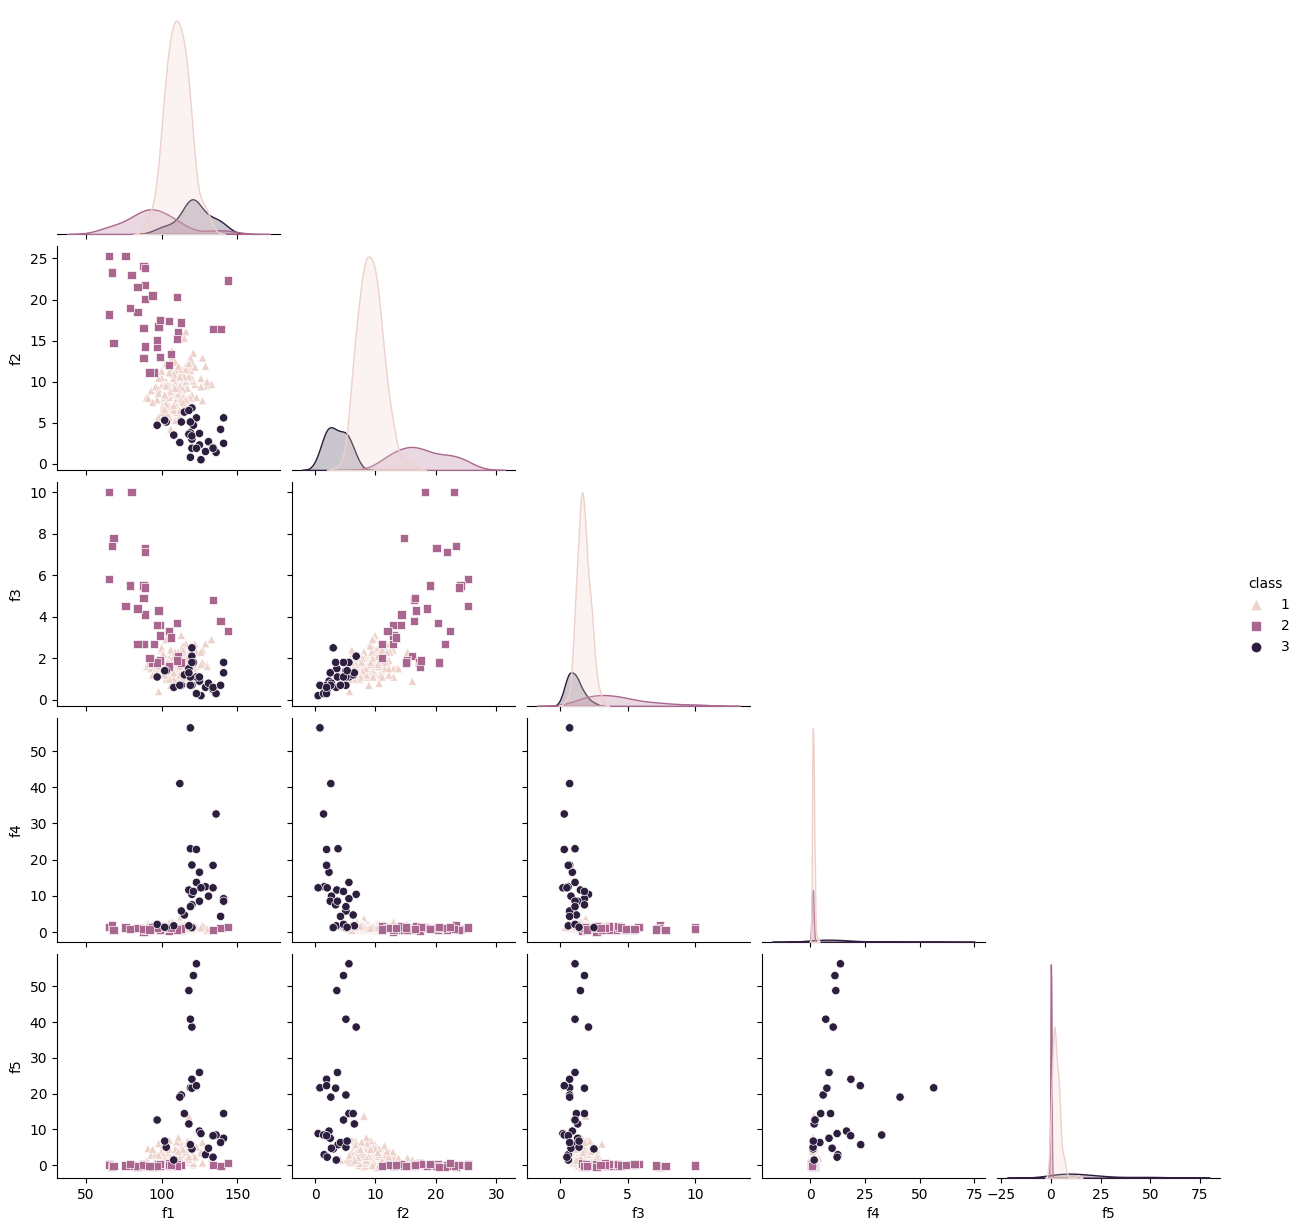

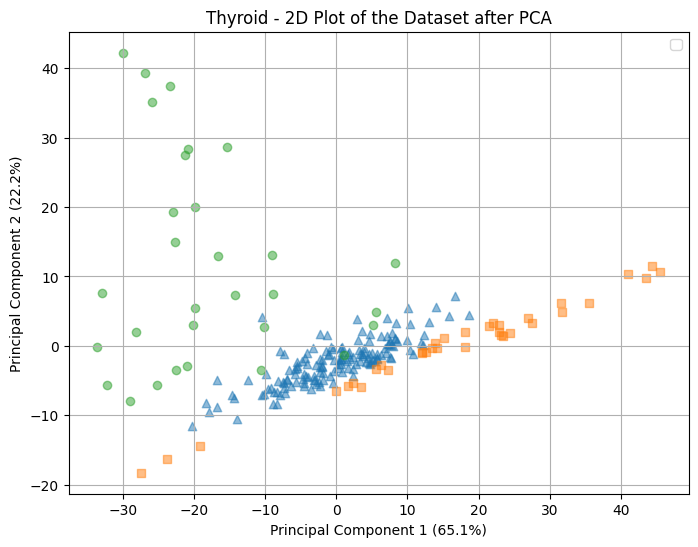

Instances: 215; Features: 5; Clusters: class    3
dtype: int64


In [2]:
### Thyroid dataset
# fetch dataset 
thyroid = load_thyroid()

# data (as pandas dataframes) 
X = thyroid.iloc[:, 1:]
y = pd.DataFrame(thyroid.iloc[:, 0])
c = 3

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

markers = ['^', 's', 'o']
plotting(X, y, "Thyroid", matrix_plot=True, markers=markers)
print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [3]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510652, 4.502758197510653, 4.502758197510653]
ARI values: [0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282, 0.765296460087282]
NS values: [1.7172190556109885, 1.3705161418606207, 1.3952970088049543, 1.7806592484166315, 1.3952970088049543, 1.765982059115153, 1.3952970088049543, 1.3705161418606207, 1.7071153779681334, 1.7071153779681334]
NMI values: [0.7177567243150124, 0.7177567243150123, 0.7177567243150123, 0.7177567243150123, 0.7177567243150123, 0.7177567243150124, 0.7177567243150123, 0.7177567243150123, 0.7177567243150124, 0.7177567243150124]


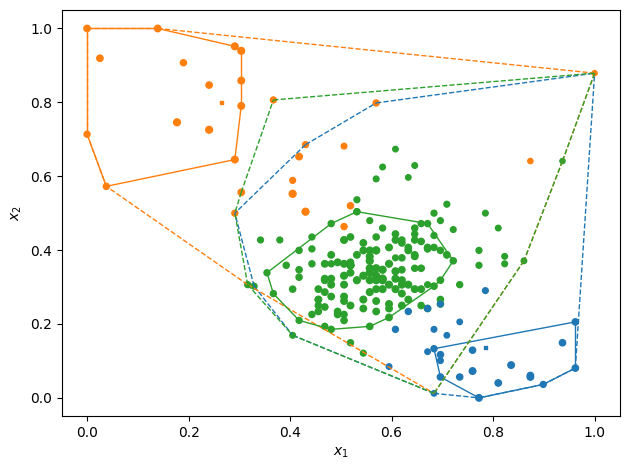

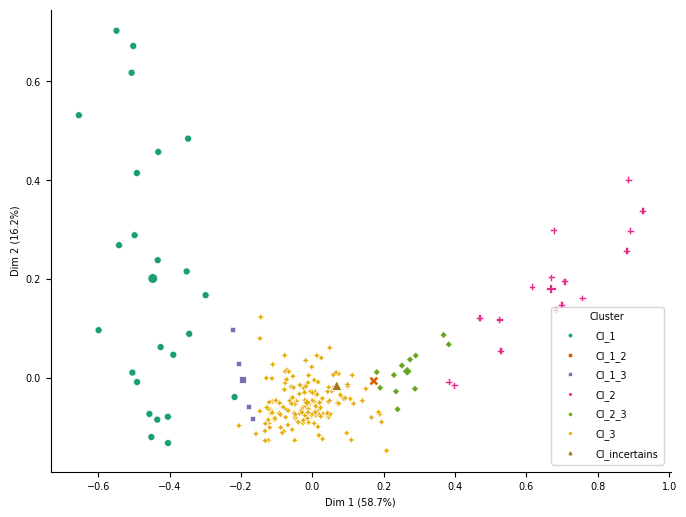

In [4]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [35]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.016223056851345386, 0.016223056851345393, 0.016223056851345393, 0.016223056851345397, 0.016223056851345403, 0.016223056851345403, 0.016223056851345407, 0.016223056851345417, 0.016223056851345417, 0.016223056851345417]
ARI values: [0.2207583653089674, 0.2207583653089674, 0.2207583653089674, 0.2207583653089674, 0.2207583653089674, 0.2207583653089674, 0.2207583653089674, 0.2207583653089674, 0.2207583653089674, 0.2207583653089674]
NS values: [0.5937658802435126, 1.2067368619042558, 1.2067368619042558, 0.7855639446337697, 0.8221428525957601, 0.8221428525957601, 1.212043008858103, 0.5518808253276746, 0.5518808253276746, 0.5518808253276746]
NMI values: [0.3490426856135991, 0.3490426856135991, 0.3490426856135991, 0.3490426856135991, 0.34904268561359897, 0.34904268561359897, 0.3490426856135991, 0.3490426856135991, 0.3490426856135991, 0.3490426856135991]


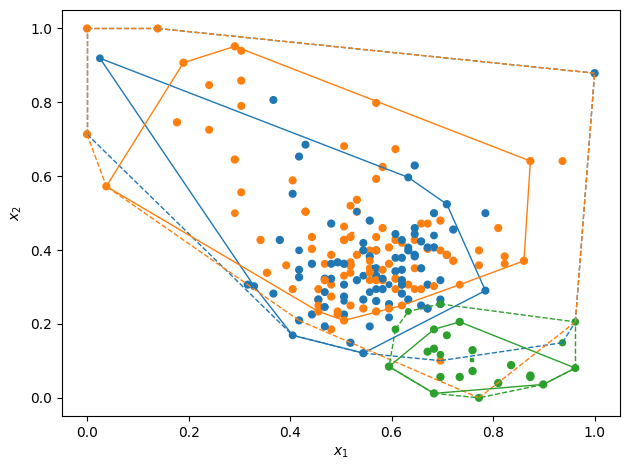

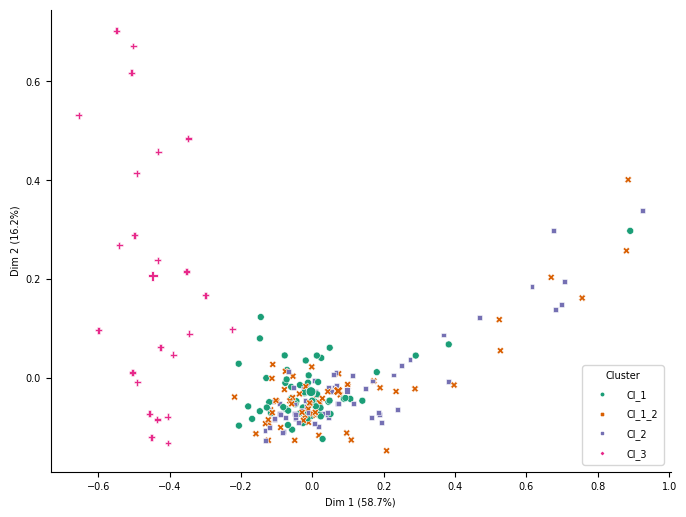

In [36]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [9]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.021188743434480937, 0.021188818048281988, 0.021190107377717968, 0.021190240617778515, 0.02119050770028275, 0.032082852661004614, 0.032083182488849504, 0.03208323678010628, 0.032083323408562105, 0.032083340643931084]
ARI values: [0.2691573279392847, 0.2691573279392847, 0.2771266885365329, 0.2771266885365329, 0.2715768000186057, 0.20177474789887004, 0.20179564436614483, 0.20097152909992624, 0.20179564436614483, 0.20179564436614483]
NMI values: [0.32648426477705483, 0.32648426477705483, 0.30796358965951814, 0.30796358965951814, 0.33430100715808836, 0.3483129652643236, 0.3415816294947648, 0.3548581999719469, 0.3415816294947648, 0.3415816294947648]


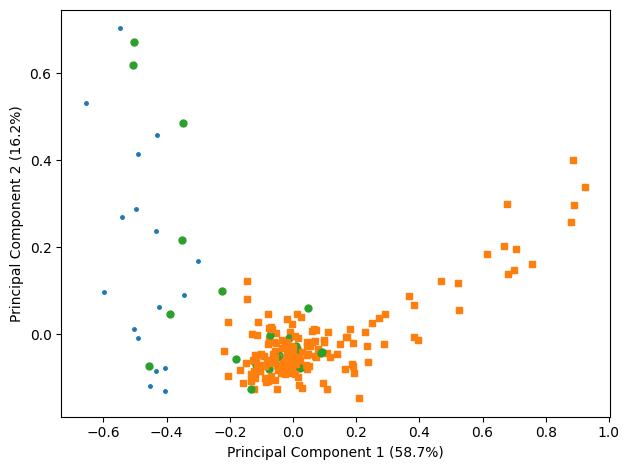

In [10]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [11]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=3.2, verbose=True)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [0.3023408623483177, 0.3023408623483177]
ARI values: [0.6449025337284894, 0.6449025337284894]
NMI values: [0.6138937167441253, 0.6138937167441254]


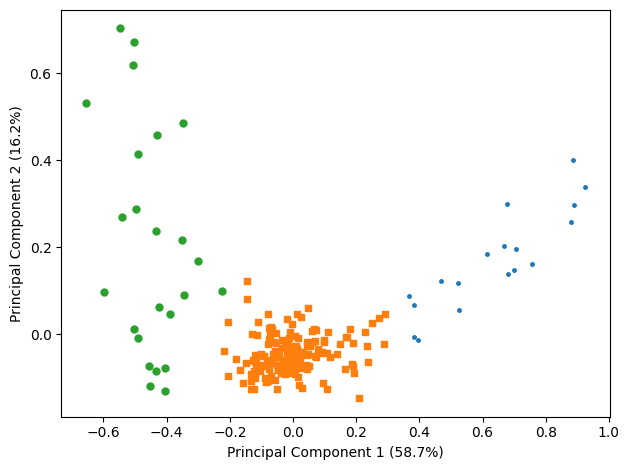

In [12]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [23]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, epsilon=1e-6)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [3.849494551937524, 3.849494551937524, 3.849760395536227, 3.849760395536227, 3.8498129781295733, 3.8498129781295733, 3.8498129781295733, 3.8498129781295733, 3.849812978129574, 3.849812978129574]
ARI values: [0.6659221790140384, 0.6659221790140384, 0.6659221790140384, 0.6659221790140384, 0.6659221790140384, 0.6659221790140384, 0.6659221790140384, 0.6659221790140384, 0.6659221790140384, 0.6659221790140384]
NMI values: [0.610657277958538, 0.610657277958538, 0.6106572779585379, 0.6106572779585379, 0.6106572779585379, 0.6106572779585379, 0.6106572779585379, 0.6106572779585379, 0.6106572779585379, 0.6106572779585379]


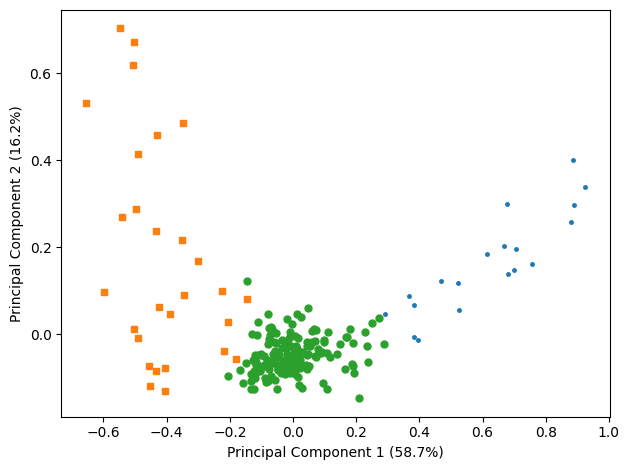

In [24]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [27]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, epsilon=1e-6)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [0.026283181333676665, 0.026283181333676665, 0.026283181333676665, 0.026283181333676665, 0.026283181333676665, 0.026283181333676665, 0.02628318133367667, 0.02628318133367667, 0.02628318133367667, 0.02628318133367667]
ARI values: [0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118]
NMI values: [0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342]


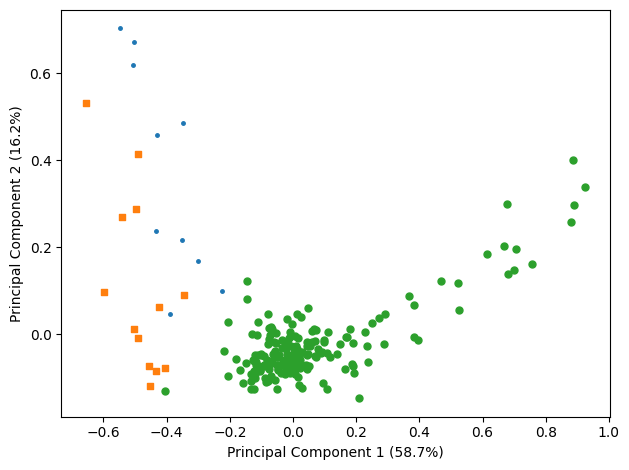

In [28]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [29]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.24520261878883204, 0.24520261878883204, 0.24520261878883204, 0.24520261878883215, 0.24520261878883215, 0.24520261878883215, 0.24520261878883215, 0.24520261878883215, 0.24520261878883215, 0.24520261878883215]
ARI values: [0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353]
NMI values: [0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592]


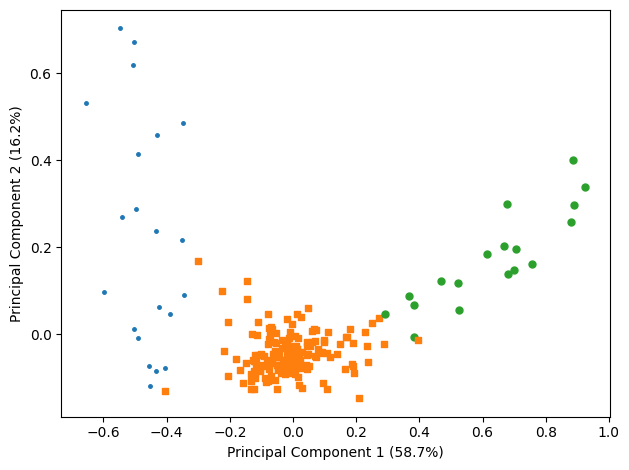

In [30]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [31]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [3.0372451667469487, 3.0372451667469487, 3.037245166746949, 3.037245166746949, 3.0372451667469496, 3.0372451667469496, 3.0372451667469496, 3.0372451667469504, 3.0372451667469504, 3.0372451667469504]
ARI values: [0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411]
NMI values: [0.5827458356980226, 0.5827458356980226, 0.5827458356980226, 0.5827458356980226, 0.5827458356980225, 0.5827458356980225, 0.5827458356980225, 0.5827458356980225, 0.5827458356980225, 0.5827458356980225]


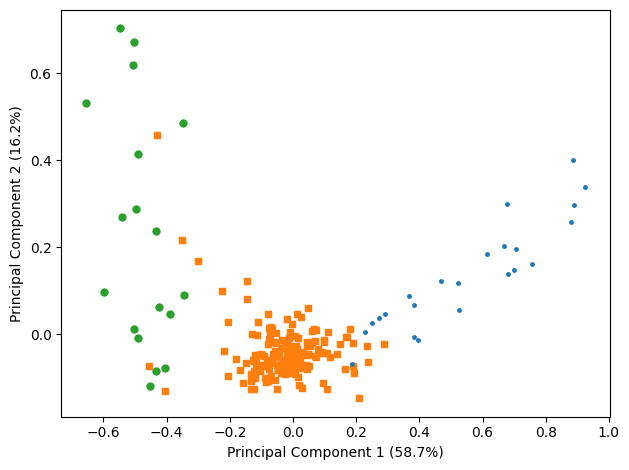

In [32]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)